# Multi-wavelength joint analysis

The aim of this tutorial is to do a joint analysis between H.E.S.S. and Fermi-LAT.

We will perform this analysis on an AGN PKS 2155-305.

In [121]:
from gammapy.data import DataStore, EventList
from gammapy.irf import PSFMap, EDispKernelMap
from gammapy.maps import MapAxis, RegionGeom, WcsGeom, Map
from gammapy.makers import SpectrumDatasetMaker, SafeMaskMaker, ReflectedRegionsBackgroundMaker
from gammapy.datasets import SpectrumDataset, Datasets, FluxPointsDataset, MapDataset
from gammapy.modeling.models import PowerLawSpectralModel, SkyModel, EBLAbsorptionNormSpectralModel, ExpCutoffPowerLawSpectralModel
from gammapy.modeling import Fit
from gammapy.estimators import FluxPointsEstimator

from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.time import Time
from regions import CircleSkyRegion

import matplotlib.pyplot as plt

## H.E.S.S.

Select H.E.S.S. observations for PKS 2155-304.

In [2]:
data_store = DataStore.from_dir("$GAMMAPY_DATA/hess-dl3-dr1/")

In [4]:
target_pos = 

In [12]:
obs_time = Time([53736, 54101], format="mjd", scale="tt")

In [13]:
obs_table = data_store.obs_table
obs_table = obs_table.select_sky_circle
obs_table = obs_table.select_time_range

In [16]:
obs_table

OBS_ID,RA_PNT,DEC_PNT,GLON_PNT,GLAT_PNT,ZEN_PNT,ALT_PNT,AZ_PNT,OBJECT,RA_OBJ,DEC_OBJ,OFFSET_OBJ,ONTIME,LIVETIME,DEADC,TSTART,TSTOP,DATE-OBS,TIME-OBS,DATE-END,TIME-END,N_TELS,TELLIST,QUALITY,MUONEFF,EVENT_COUNT,TARGET_NAME,TARGET_TAG,TARGET_OFFSET,SAFE_ENERGY_LO,SAFE_ENERGY_HI
,deg,deg,deg,deg,deg,deg,deg,,deg,deg,deg,s,s,,s,s,,,,,,,,,,,,deg,TeV,TeV
int64,float32,float32,float32,float32,float32,float32,float32,bytes18,float32,float32,float32,float32,float32,float32,float64,float64,bytes10,bytes12,bytes10,bytes12,int64,bytes7,int64,float32,int64,bytes21,bytes14,float32,float32,float32
33787,329.71667,-29.725555,18.541153,-52.188046,50.42014,39.57986,110.0,PKS 2155-304,329.71667,-30.225555,0.5,1689.0,1645.9437,0.9745078,175897474.0,175899163.0,2006-07-29,20:25:38.184,2006-07-29,20:53:47.184,4,"1,2,3,4",0,1.0196152,7176,PKS 2155-304 (flare),pks2155_flare,0.500033,1.0715193,100.0
33788,329.13797,-30.225555,17.639944,-51.748703,43.876087,46.123913,110.0,PKS 2155-304,329.71667,-30.225555,0.50002956,1689.0,1596.1018,0.9449981,175899293.0,175900982.0,2006-07-29,20:55:57.184,2006-07-29,21:24:06.184,4,"1,2,3,4",0,1.0166186,8295,PKS 2155-304 (flare),pks2155_flare,0.5002569,0.70794576,100.0
33789,330.29538,-30.225555,17.818897,-52.742733,37.320198,52.679802,110.0,PKS 2155-304,329.71667,-30.225555,0.50002956,1688.0,1583.4436,0.938059,175901110.0,175902798.0,2006-07-29,21:26:14.184,2006-07-29,21:54:22.184,4,"1,2,3,4",0,1.0242585,10014,PKS 2155-304 (flare),pks2155_flare,0.4998021,0.53703177,100.0
33790,329.71667,-30.725555,16.917807,-52.297615,30.75443,59.245567,110.016365,PKS 2155-304,329.71667,-30.225555,0.5,1690.0,1561.3771,0.9238918,175902930.0,175904620.0,2006-07-29,21:56:34.184,2006-07-29,22:24:44.184,4,"1,2,3,4",0,1.0232483,10624,PKS 2155-304 (flare),pks2155_flare,0.49996707,0.40738028,100.0
33791,329.71667,-29.725555,18.541153,-52.188046,24.24126,65.75874,112.37419,PKS 2155-304,329.71667,-30.225555,0.5,1689.0,1567.8776,0.9282875,175904751.0,175906440.0,2006-07-29,22:26:55.184,2006-07-29,22:55:04.184,4,"1,2,3,4",0,1.0132304,10763,PKS 2155-304 (flare),pks2155_flare,0.500033,0.33113113,100.0
33792,329.13797,-30.225555,17.639944,-51.748703,17.864033,72.13597,116.916855,PKS 2155-304,329.71667,-30.225555,0.50002956,1688.0,1562.3591,0.9255682,175906576.0,175908264.0,2006-07-29,22:57:20.184,2006-07-29,23:25:28.184,4,"1,2,3,4",0,1.0222732,10926,PKS 2155-304 (flare),pks2155_flare,0.5002569,0.30902955,100.0
33793,330.29538,-30.225555,17.818897,-52.742733,11.910335,78.08967,128.6549,PKS 2155-304,329.71667,-30.225555,0.50002956,1689.0,1566.6709,0.927573,175908409.0,175910098.0,2006-07-29,23:27:53.184,2006-07-29,23:56:02.184,4,"1,2,3,4",0,1.0103153,10781,PKS 2155-304 (flare),pks2155_flare,0.4998021,0.28840315,100.0
33794,329.71667,-30.725555,16.917807,-52.297615,7.234592,82.76541,171.94302,PKS 2155-304,329.71667,-30.225555,0.5,1688.0,1564.7129,0.9269626,175910705.0,175912393.0,2006-07-30,00:06:09.184,2006-07-30,00:34:17.184,4,"1,2,3,4",0,1.0147448,11024,PKS 2155-304 (flare),pks2155_flare,0.49996707,0.25118864,100.0


In [17]:
len(obs_table)

15

Get the observations

In [18]:
observations = 

In [19]:
print(observations)

Observations
Number of observations: 15
Observation

	obs id            : 33787 
 	tstart            : 53945.85
	tstop             : 53945.87
	duration          : 1689.00 s
	pointing (icrs)   : 329.7 deg, -29.7 deg

	deadtime fraction : 2.5%
Observation

	obs id            : 33788 
 	tstart            : 53945.87
	tstop             : 53945.89
	duration          : 1689.00 s
	pointing (icrs)   : 329.1 deg, -30.2 deg

	deadtime fraction : 5.5%
Observation

	obs id            : 33789 
 	tstart            : 53945.89
	tstop             : 53945.91
	duration          : 1688.00 s
	pointing (icrs)   : 330.3 deg, -30.2 deg

	deadtime fraction : 6.2%
Observation

	obs id            : 33790 
 	tstart            : 53945.91
	tstop             : 53945.93
	duration          : 1690.00 s
	pointing (icrs)   : 329.7 deg, -30.7 deg

	deadtime fraction : 7.6%
Observation

	obs id            : 33791 
 	tstart            : 53945.94
	tstop             : 53945.95
	duration          : 1689.00 s
	pointing (icrs)   

Data reduction loop

In [22]:
on_region = CircleSkyRegion(target_pos, 0.1*u.deg)

In [26]:
energy_axis = MapAxis.from_energy_bounds(
    0.1, 40, nbin=10, per_decade=True, unit="TeV", name="energy"
)
energy_axis_true = MapAxis.from_energy_bounds(
    0.05, 100, nbin=20, per_decade=True, unit="TeV", name="energy_true"
)

geom = RegionGeom.create(region=on_region, axes=[energy_axis])
dataset_empty = SpectrumDataset.create(geom=geom, energy_axis_true=energy_axis_true)

dataset_maker = SpectrumDatasetMaker(
    containment_correction=True, selection=["counts", "exposure", "edisp"]
)
bkg_maker = ReflectedRegionsBackgroundMaker()
safe_mask_masker = SafeMaskMaker(methods=["aeff-max"], aeff_percent=10)

In [31]:
obs_ids = observations.ids
datasets = Datasets()

for obs_id, observation in zip(obs_ids, observations):
    dataset = dataset_maker.run(dataset_empty.copy(name=str(obs_id)), observation)
    dataset_on_off = bkg_maker.run(dataset, observation)
    dataset_on_off = safe_mask_masker.run(dataset_on_off, observation)
    datasets.append(dataset_on_off)

print(datasets)

Datasets
--------

Dataset 0: 

  Type       : SpectrumDatasetOnOff
  Name       : 33787
  Instrument : HESS
  Models     : 

Dataset 1: 

  Type       : SpectrumDatasetOnOff
  Name       : 33788
  Instrument : HESS
  Models     : 

Dataset 2: 

  Type       : SpectrumDatasetOnOff
  Name       : 33789
  Instrument : HESS
  Models     : 

Dataset 3: 

  Type       : SpectrumDatasetOnOff
  Name       : 33790
  Instrument : HESS
  Models     : 

Dataset 4: 

  Type       : SpectrumDatasetOnOff
  Name       : 33791
  Instrument : HESS
  Models     : 

Dataset 5: 

  Type       : SpectrumDatasetOnOff
  Name       : 33792
  Instrument : HESS
  Models     : 

Dataset 6: 

  Type       : SpectrumDatasetOnOff
  Name       : 33793
  Instrument : HESS
  Models     : 

Dataset 7: 

  Type       : SpectrumDatasetOnOff
  Name       : 33794
  Instrument : HESS
  Models     : 

Dataset 8: 

  Type       : SpectrumDatasetOnOff
  Name       : 33795
  Instrument : HESS
  Models     : 

Dataset 9: 

  Typ

Stack the dataset using `stack_reduce`

## Fermi-LAT

Read the events using `EventList.read`. Fermi-LAT events are stored in the file "ft1_00.fits"

In [95]:
events = 

In [96]:
print(events)

EventList
---------

  Instrument       : LAT
  Telescope        : GLAST
  Obs. ID          : 

  Number of events : 630
  Event rate       : 0.001 1 / s

  Time start       : 54704.000754444445
  Time stop        : 54715.000754444445

  Min. energy      : 2.00e+02 MeV
  Max. energy      : 4.19e+04 MeV
  Median energy    : 4.10e+02 MeV




In [97]:
events.table

ENERGY,RA,DEC,L,B,THETA,PHI,ZENITH_ANGLE,EARTH_AZIMUTH_ANGLE,TIME,EVENT_ID,RUN_ID,RECON_VERSION,CALIB_VERSION,EVENT_CLASS,EVENT_TYPE,CONVERSION_TYPE,LIVETIME,DIFRSP0,DIFRSP1,DIFRSP2,DIFRSP3,DIFRSP4
MeV,deg,deg,deg,deg,deg,deg,deg,deg,s,,,,,,,,s,,,,,
float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,int32,int32,int16,int16[3],bool[32],bool[32],int16,float64,float32,float32,float32,float32,float32
858.8792,333.12192,-23.725653,29.30648,-54.097145,32.316307,165.16573,28.091183,142.64781,241987438.68640068,6892216,241984516,0,0 .. 0,False .. True,False .. True,0,53.597787618637085,0.0,0.0,0.0,0.0,0.0
207.45532,335.7745,-25.522879,27.13889,-56.842373,6.618401,178.26152,29.350693,211.9563,241483233.77777222,7326845,241480337,0,0 .. 0,False .. True,False .. True,0,136.37941387295723,0.0,0.0,0.0,0.0,0.0
1338.4224,335.38297,-25.015612,27.913506,-56.393997,68.472374,193.81874,40.977856,249.03566,241569726.79866385,8659744,241566277,0,0 .. 0,False .. True,False .. False,1,156.76379770040512,0.0,0.0,0.0,0.0,0.0
423.0177,336.52,-26.02873,26.450539,-57.595818,63.952934,190.00992,75.32312,247.80884,241644968.32224396,9617589,241640759,0,0 .. 0,False .. True,False .. True,0,18.317135006189346,0.0,0.0,0.0,0.0,0.0
441.5131,334.59448,-24.430859,28.658962,-55.56878,32.967598,155.95055,40.474422,149.15858,241677604.84197778,9754410,241673636,0,0 .. 0,False .. True,False .. True,0,176.95219510793686,0.0,0.0,0.0,0.0,0.0
328.32962,336.67642,-27.343445,24.058662,-57.943592,24.567049,193.25214,29.658623,244.95168,241793273.66578913,6547029,241789698,0,0 .. 0,False .. True,False .. False,1,80.41369599103928,0.0,0.0,0.0,0.0,0.0
274.10733,337.91675,-28.455286,22.201437,-59.16808,34.297943,194.11908,37.097027,252.28847,241896708.49176204,8128655,241892847,0,0 .. 0,False .. True,False .. True,0,74.81019324064255,0.0,0.0,0.0,0.0,0.0
249.80746,336.89337,-27.177269,24.421429,-58.110657,28.124403,191.43874,21.876955,249.79276,242057032.97724077,6861554,242053458,0,0 .. 0,False .. True,False .. True,0,31.341847330331802,0.0,0.0,0.0,0.0,0.0


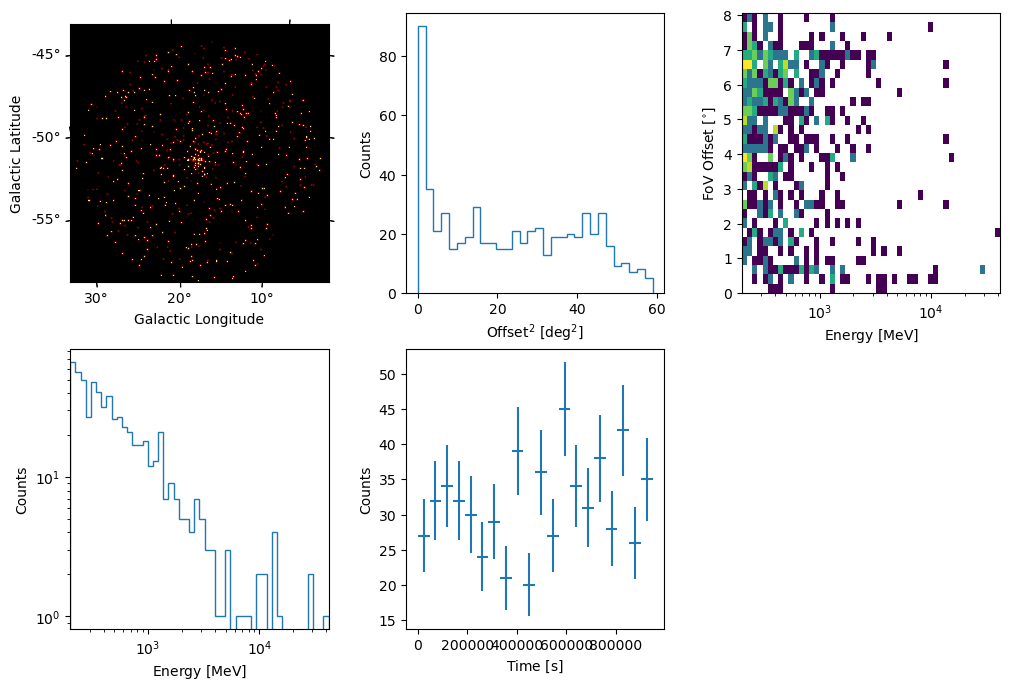

In [98]:
events.peek()

create an energy axis from 0.2 to 300 GeV with 8 bins

In [99]:
energy_axis = 
print(energy_axis)

MapAxis

	name       : energy    
	unit       : 'GeV'     
	nbins      : 8         
	node type  : edges     
	edges min  : 2.0e-01 GeV
	edges max  : 3.0e+02 GeV
	interp     : log       



Create a WcsGeom with a width of 10deg and 0.1 deg per bin centered on the source position

In [102]:
geom = 
print(geom)

WcsGeom

	axes       : ['lon', 'lat', 'energy']
	shape      : (100, 100, 8)
	ndim       : 3
	frame      : icrs
	projection : TAN
	center     : 329.7 deg, -30.2 deg
	width      : 10.0 deg x 10.0 deg
	wcs ref    : 329.7 deg, -30.2 deg



Create a counts map using this geometry

In [1]:
counts = 
print(counts)

SyntaxError: invalid syntax (2719592744.py, line 1)

Fill the counts map with the event using `Map.fill_events`.

In [106]:
counts.fill_events(events)

Read the exposure using a `Map.read`. The exposure is stored in 'bexpmap_roi_00.fits'.

In [107]:
exposure = 

/Users/mregeard/anaconda3/envs/gammapy-1.2/lib/python3.10/site-packages/astropy/wcs/wcs.py:539: FITSFixedWarning: RADECSYS= 'FK5 ' 
the RADECSYS keyword is deprecated, use RADESYSa.
  wcsprm = _wcs.Wcsprm(
/Users/mregeard/anaconda3/envs/gammapy-1.2/lib/python3.10/site-packages/astropy/wcs/wcs.py:807: FITSFixedWarning: 'datfix' made the change 'Set DATEREF to '2001-01-01T00:01:04.184' from MJDREF.
Set MJD-OBS to 54704.000000 from DATE-OBS.
Set MJD-END to 54715.000000 from DATE-END'.
  warnings.warn(


In [108]:
print(exposure)

WcsNDMap

	geom  : WcsGeom 
 	axes  : ['lon', 'lat', 'energy_true']
	shape : (100, 100, 14)
	ndim  : 3
	unit  : cm2 s
	dtype : >f4



In [109]:
energy_true = exposure.geom.axes["energy_true"]

In [110]:
irf_geom = WcsGeom(wcs=counts.geom.wcs, npix=counts.geom.npix, axes=[energy_true])

In [111]:
exposure = exposure.interp_to_geom(irf_geom)
print(exposure)

WcsNDMap

	geom  : WcsGeom 
 	axes  : ['lon', 'lat', 'energy_true']
	shape : (100, 100, 14)
	ndim  : 3
	unit  : cm2 s
	dtype : float64



<WCSAxes: >

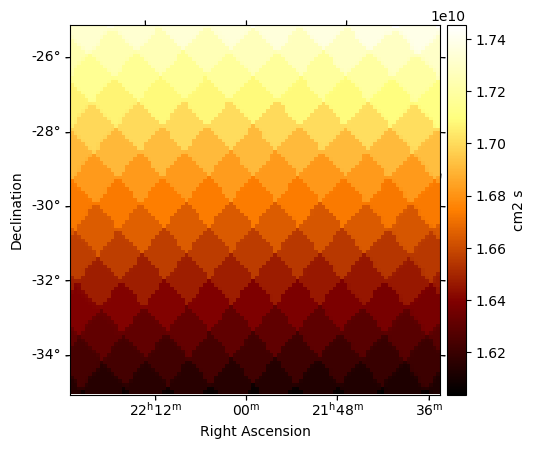

In [112]:
exposure.sum_over_axes().plot(add_cbar=True)

Read the psf using `PSFMap.read`. The psf is stored in 'psf_00.fits'.

In [116]:
psf = 
print(psf)

RegionNDMap

	geom  : RegionGeom 
 	axes  : ['lon', 'lat', 'rad', 'energy_true']
	shape : (1, 1, 200, 26)
	ndim  : 4
	unit  : 1 / sr
	dtype : >f8



<WCSAxes: >

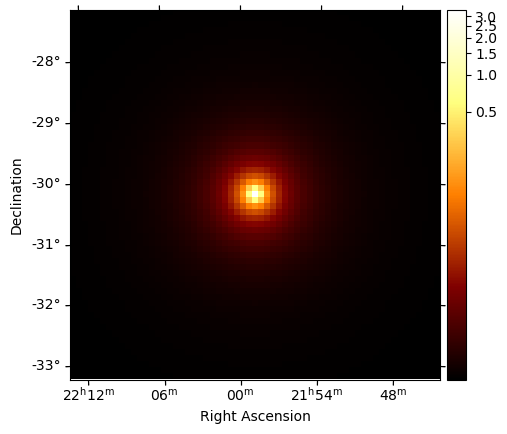

In [117]:
psf_kernel = psf.get_psf_kernel(position=irf_geom.center_skydir,
                               geom=irf_geom,
                               max_radius="3 deg")
psf_kernel.psf_kernel_map.sum_over_axes().plot(stretch='log', add_cbar=True)

Create a diagonal energy dispersion matrix using `EDispKernelMap.from_diagonal_response`.

<Axes: xlabel='True Energy [$\\mathrm{MeV}$]', ylabel='Energy [$\\mathrm{GeV}$]'>

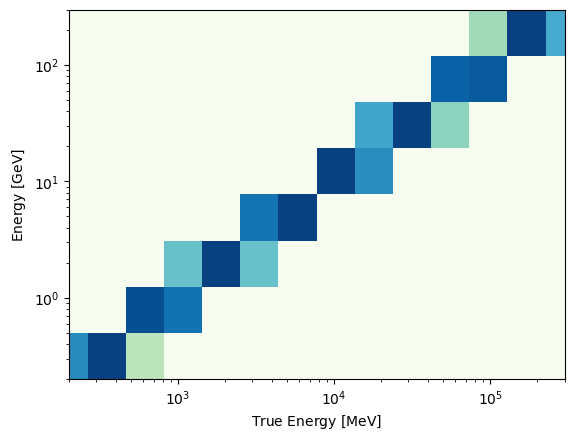

In [119]:
edisp = 
edisp.get_edisp_kernel().plot_matrix()

Create the fermi dataset by putting the counts and IRFs that we have created above into a `MapDataset`.

In [123]:
fermi_dataset = 

Now that we have our tow dataset, we can try to fit them together.

First, we need to put them together in a `Datasets` object.

In [ ]:
datasets = 

Then we also need two background model specific to Fermi:

In [ ]:
diffuse_iso = create_fermi_isotropic_diffuse_model(
    filename='iso_P8R3_SOURCE_V3_v1.txt'
)
diffuse_iso.datasets_names = fermi_dataset.name
print(diffuse_iso)

In [ ]:
diffuse_galactic_fermi = Map.read('gll_iem_v07.fits')

template_diffuse = TemplateSpatialModel(diffuse_galactic_fermi, normalize=False)
diffuse_iem = SkyModel(spectral_model=PowerLawNormSpectralModel(),
                      spatial_model=template_diffuse,
                      name='diffuse-iem')
diffuse_iem.datasets_names = fermi_dataset.name

## Fitting the data:

Try to fit the data using an `ExpCutoffPowerLawSpectralModel`.

If you fit is working, you can also refit the data accounting for the EBL by multiplying you spectral model by an EBL model.

In [ ]:
abs_model = EBLAbsorptionNormSpectralModel.read_builtin()
abs_model.redshift.value = 0.116
source_model = SkyModel(spectral_model=spectral_model*abs_model, spatial_model=spatial_model,
                      name='PKS 2155')

Produce the SED and flux-points.